# Introduction to Linear Regression Analysis

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# for jupyter plot visualization
% matplotlib inline
# filtering out warnings 
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="sklearn", message="^max_iter")
warnings.filterwarnings(action="ignore", module="sklearn", message="^Maximum")

In [2]:
# data import
df = pd.read_csv('dataset_raw.csv')
stats_df = df.drop(['city', 'state', 'zip'], 1)
stats_df = stats_df.dropna()

## Summary Statistics

In [3]:
summary_df = pd.concat([stats_df.describe().T, stats_df.median(), stats_df.mode().iloc[0], stats_df.var()], axis=1)
summary_df.columns = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max', 'Median', 'Mode', 'Variance']
summary_df

,Count,Mean,Std,Min,25%,50%,75%,Max,Median,Mode,Variance
price,3854.0,2.904184e+06,6.325874e+06,9900.00,655000.00,1300000.0,2799749.25,180000000.0,1300000.0,799000.0,4.001669e+13
sqft,3854.0,2.869577e+03,2.740097e+03,110.00,1367.25,2072.0,3500.00,51000.0,2072.0,1200.0,7.508132e+06
bedrooms,3854.0,3.774520e+00,2.428690e+00,0.00,2.00,3.0,4.00,48.0,3.0,3.0,5.898536e+00
bathrooms,3854.0,3.503762e+00,2.725417e+00,0.75,2.00,3.0,4.00,48.0,3.0,2.0,7.427899e+00


## Finding Outliers Outside of 3 Standard Deviations, and Noting it

In [4]:
outlier_index = []
for col in stats_df:
    upper_standard_dev_3 = stats_df[col].std() * 3
    lower_standard_dev_3 = -upper_standard_dev_3
    outlier_index.extend(stats_df.index[(stats_df[col] > upper_standard_dev_3) | (stats_df[col] < lower_standard_dev_3)].tolist())
outlier_index = set(outlier_index)

In [5]:
outlier_bool_df = stats_df.index.isin(outlier_index)

In [6]:
df_sans_outliers = stats_df[~outlier_bool_df]
df_sans_outliers.to_csv('dataset_cleaned.csv', index=False)
outlier_df = stats_df[outlier_bool_df]
outlier_df.to_csv('dataset_outliers.csv', index=False)
outlier_df

,price,sqft,bedrooms,bathrooms
208,699000.0,3695.0,8.0,6.00
226,699900.0,4740.0,16.0,8.00
232,690000.0,2655.0,8.0,4.00
233,719900.0,3636.0,8.0,4.00
273,555000.0,2848.0,8.0,4.00
285,625000.0,2690.0,8.0,4.00
379,2100000.0,7638.0,8.0,14.00
386,2050000.0,6709.0,13.0,13.00
387,2020000.0,4888.0,8.0,4.00
392,2125000.0,7836.0,12.0,12.00


## Scatter Plot Matrix

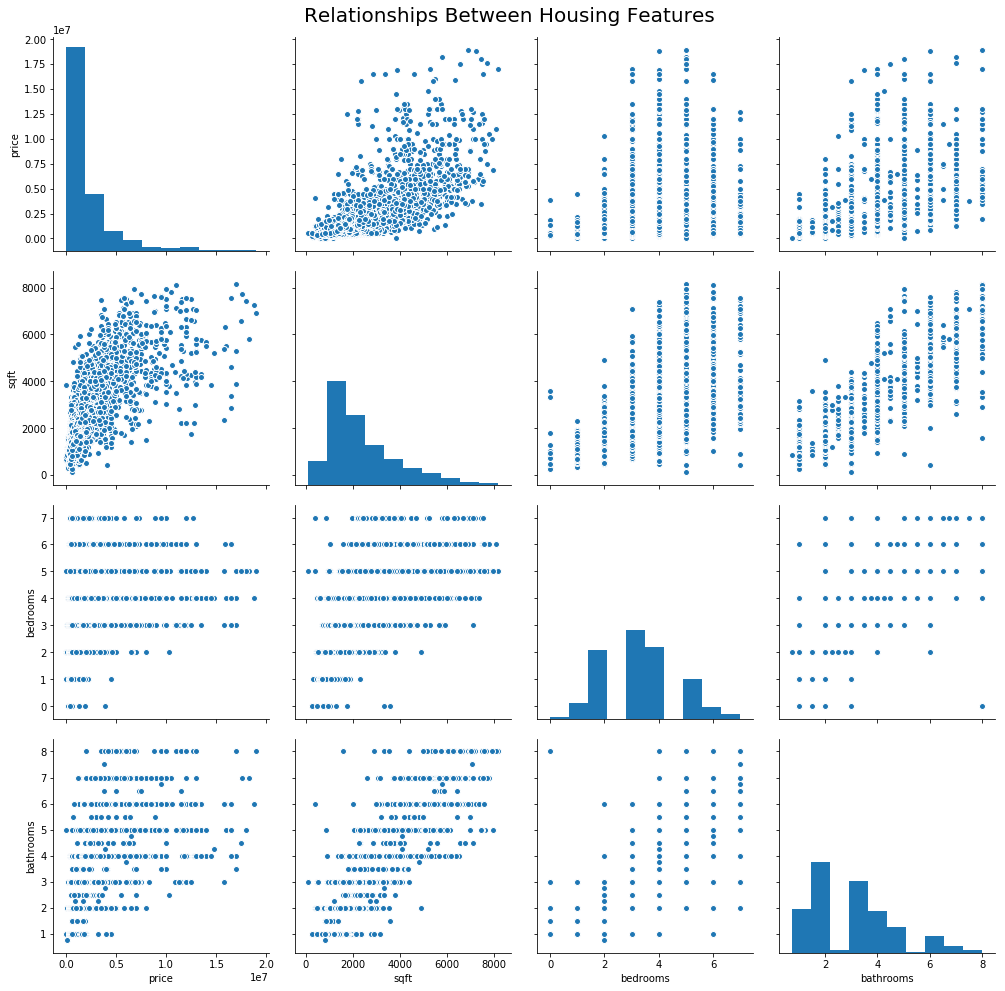

In [7]:
g = sns.pairplot(df_sans_outliers, size=3.5)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Relationships Between Housing Features', size=20)
plt.show()

## Correlation Mapping

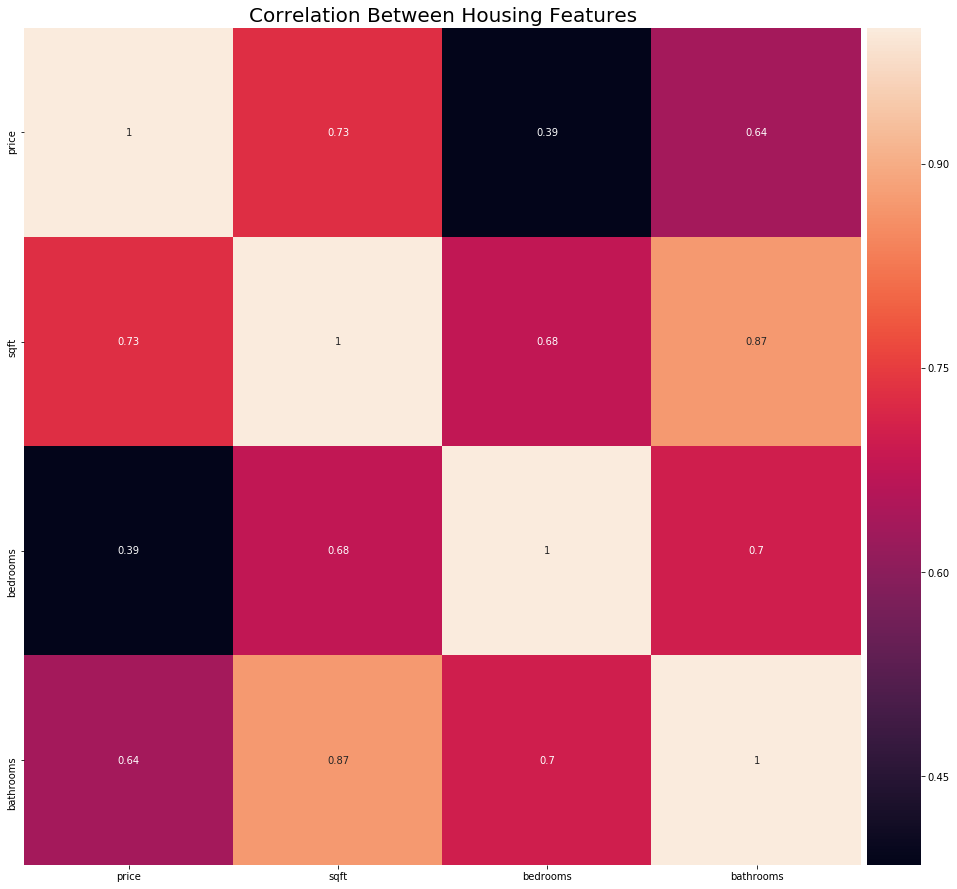

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
cbar_ax = fig.add_axes([.905, .15, .05, .775])
sns.heatmap(df_sans_outliers.corr(), annot=True, square=True, cbar_ax=cbar_ax, ax=ax).set_title('Correlation Between Housing Features', size=20)
plt.subplots_adjust(top=0.95)
plt.show()

## Correlation Coefficients Ranked

In [9]:
# subtracting the outliers from the training dataset
training_df = df_sans_outliers.copy()
training_df.corr()['price'].sort_values(ascending=False).iloc[1:]

sqft         0.729050
bathrooms    0.636941
bedrooms     0.385059
Name: price, dtype: float64

## ML and Model Optimization

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
# defining the independent and dependent variables
X = training_df.drop('price', 1)
y = training_df['price']

In [12]:
# creating grid search cv parameters for brute force parameter searching
sgd = GridSearchCV(SGDRegressor(), param_grid={
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'max_iter': [1000],
    'tol': [1e-3]
}, return_train_score=True, scoring='neg_mean_squared_error')

lr = GridSearchCV(LinearRegression(), param_grid={
    'fit_intercept': [True, False],
    'normalize': [True, False]
}, return_train_score=True, scoring='neg_mean_squared_error')

In [13]:
# Manually selecting most important features
three_feature_df = X[['sqft', 'bedrooms', 'bathrooms']]
two_feature_df = X[['sqft', 'bathrooms']]
one_feature_df = X['sqft'].values.reshape(-1, 1)

In [14]:
# Iterating through the dataframes containing 1, 2, and 3 features
MSE_ranking_dict = {}
for x, name in zip([three_feature_df, two_feature_df, one_feature_df], ['three', 'two', 'one']):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
    
    # fitting the GridSearchCV pipelines
    lr.fit(x, y)
    sgd.fit(x, y)
    
    # fitting the best estimators of each grid search
    lr.best_estimator_.fit(X_train, y_train)
    sgd.best_estimator_.fit(X_train, y_train)
    
    # assigning keys and values for display  
    lr_key = f"Linear Regression MSE using {name} features"
    lr_value = mean_squared_error(y_test, lr.best_estimator_.predict(X_test))
    lr_coefs = [y for y in lr.best_estimator_.coef_]
    if len(lr_coefs) < 6:
        if name == 'three':
            lr_coefs = [0] * (3 - len(lr_coefs)) + lr_coefs
        elif name == 'two':
            lr_coefs = [0] * (2 - len(lr_coefs)) + [lr_coefs[0]] + [0] + [lr_coefs[1]]
        elif name == 'one':
            lr_coefs = [0] * (1 - len(lr_coefs)) + lr_coefs + [0] * 2
    sgd_key = f"Stochastic Gradient Descent MSE using {name} features"
    sgd_value = mean_squared_error(y_test, sgd.best_estimator_.predict(X_test))
    sgd_coefs = [y for y in sgd.best_estimator_.coef_]
    if len(sgd_coefs) < 6:
        if name == 'three':
            sgd_coefs = [0] * (3 - len(sgd_coefs)) + sgd_coefs
        elif name == 'two':
            sgd_coefs = [0] * (2 - len(sgd_coefs)) + [sgd_coefs[0]] + [0] + [sgd_coefs[1]]
        elif name == 'one':
            sgd_coefs = [0] * (1 - len(sgd_coefs)) + sgd_coefs + [0] * 2
    MSE_ranking_dict[sgd_key] = [sgd_value] + sgd_coefs + [sgd.best_estimator_.intercept_[0]]
    MSE_ranking_dict[lr_key] = [lr_value] + lr_coefs + [lr.best_estimator_.intercept_]

In [15]:
# displaying and sorting the MSEs of each model/feature combination
MSE_diplay_df = pd.DataFrame.from_dict(MSE_ranking_dict, orient='index')
MSE_diplay_df.columns = ['MSE'] + [f"{x.capitalize()} Coefficient" for x in list(X.columns)] + ['Intercept']
MSE_diplay_df.sort_values('MSE')

,MSE,Sqft Coefficient,Bedrooms Coefficient,Bathrooms Coefficient,Intercept
Linear Regression MSE using three features,2.159930e+12,1329.032121,-478781.881023,184887.903543,0.000000
Linear Regression MSE using one features,2.289238e+12,1245.575063,0.000000,0.000000,-867145.128313
Linear Regression MSE using two features,2.300640e+12,1208.893497,0.000000,39181.022735,-897833.947720
Stochastic Gradient Descent MSE using two features,2.761413e+12,730.247299,0.000000,0.787916,-0.006892
Stochastic Gradient Descent MSE using three features,2.831666e+12,706.831126,-8.860507,-0.611444,-3.167617
Stochastic Gradient Descent MSE using one features,2.859165e+12,698.301395,0.000000,0.000000,-3.100311


## Normalized Root Mean Squared Error

In [16]:
pd.Series(np.sqrt(MSE_diplay_df['MSE'])/y_train.mean()).sort_values()

Linear Regression MSE using three features              0.685786
Linear Regression MSE using one features                0.706016
Linear Regression MSE using two features                0.707772
Stochastic Gradient Descent MSE using two features      0.775416
Stochastic Gradient Descent MSE using three features    0.785217
Stochastic Gradient Descent MSE using one features      0.789021
Name: MSE, dtype: float64